In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from io import BytesIO

In [2]:
file_path = "BENCHMARKS/csv_stuff-20210422234511/io.csv"

In [34]:
sd = "sda2"

In [3]:
content = ""
with open(file_path, 'r') as f:
    for line in f.readlines():
        if "#" in line:
            header = line
        else:
            content += line

content = header+content

In [4]:
header

'# hostname;interval;timestamp;DEV;tps;rkB/s;wkB/s;areq-sz;aqu-sz;await;svctm;%util\n'

In [5]:
content_stream = BytesIO(content.encode())

In [6]:
df = pd.read_csv(content_stream, delimiter=';')

In [7]:
grpd = df.groupby("# hostname")

In [44]:
s1_df = grpd.get_group("an-sap-s-1")

In [45]:
s1_df = s1_df[s1_df["DEV"]==sd].reset_index(drop=True)

In [46]:
s2_df = grpd.get_group("an-sap-s-2")

In [47]:
s2_df = s2_df[s2_df["DEV"]==sd].reset_index(drop=True)

In [48]:
s1_df.head()

,# hostname,interval,timestamp,DEV,tps,rkB/s,wkB/s,areq-sz,aqu-sz,await,svctm,%util
0,an-sap-s-1,1,2021-04-22 23:45:13 UTC,sda2,233.0,0.0,59648.0,256.0,0.72,3.07,2.13,49.6
1,an-sap-s-1,1,2021-04-22 23:45:14 UTC,sda2,368.0,0.0,94208.0,256.0,1.06,2.91,1.92,70.8
2,an-sap-s-1,1,2021-04-22 23:45:15 UTC,sda2,391.0,0.0,100096.0,256.0,0.97,2.49,1.75,68.4
3,an-sap-s-1,1,2021-04-22 23:45:16 UTC,sda2,400.0,0.0,102400.0,256.0,0.82,2.05,1.48,59.2
4,an-sap-s-1,1,2021-04-22 23:45:17 UTC,sda2,403.0,0.0,103168.0,256.0,1.00,2.45,1.82,73.2


In [49]:
s1_df.tail()

,# hostname,interval,timestamp,DEV,tps,rkB/s,wkB/s,areq-sz,aqu-sz,await,svctm,%util
178,an-sap-s-1,1,2021-04-22 23:48:11 UTC,sda2,228.0,58368.0,0.0,256.0,23.15,96.84,4.39,100.0
179,an-sap-s-1,1,2021-04-22 23:48:12 UTC,sda2,234.0,59904.0,0.0,256.0,23.33,106.05,4.27,100.0
180,an-sap-s-1,1,2021-04-22 23:48:13 UTC,sda2,236.0,60416.0,0.0,256.0,19.76,85.86,4.24,100.0
181,an-sap-s-1,1,2021-04-22 23:48:14 UTC,sda2,181.0,46336.0,0.0,256.0,5.85,35.62,4.18,75.6
182,an-sap-s-1,1,2021-04-22 23:48:15 UTC,sda2,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0


In [50]:
s2_df.head()

,# hostname,interval,timestamp,DEV,tps,rkB/s,wkB/s,areq-sz,aqu-sz,await,svctm,%util
0,an-sap-s-2,1,2021-04-22 23:45:13 UTC,sda2,230.0,0.0,58880.0,256.0,0.34,1.44,0.89,20.40
1,an-sap-s-2,1,2021-04-22 23:45:14 UTC,sda2,366.0,0.0,93696.0,256.0,0.53,1.46,1.07,39.20
2,an-sap-s-2,1,2021-04-22 23:45:15 UTC,sda2,392.0,0.0,100352.0,256.0,0.66,1.69,1.13,44.40
3,an-sap-s-2,1,2021-04-22 23:45:16 UTC,sda2,401.0,0.0,102656.0,256.0,0.76,1.91,1.35,54.00
4,an-sap-s-2,1,2021-04-22 23:45:17 UTC,sda2,400.0,0.0,102400.0,256.0,0.37,0.94,0.68,27.33


<AxesSubplot:>

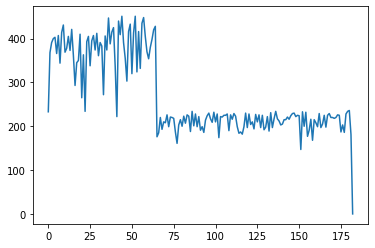

In [57]:
s1_df["tps"].plot()

<AxesSubplot:>

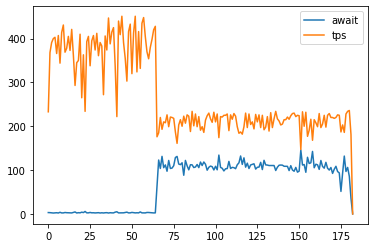

In [58]:
s1_df[["await", "tps"]].plot()

<AxesSubplot:>

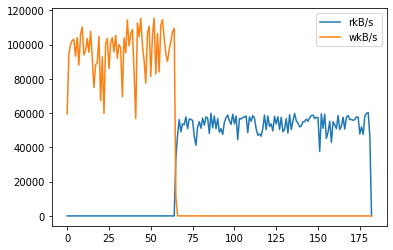

In [54]:
s1_df[["rkB/s", "wkB/s"]].plot()

<AxesSubplot:>

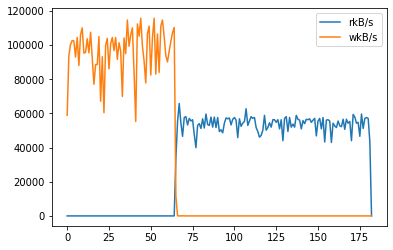

In [55]:
s2_df[["rkB/s", "wkB/s"]].plot()